## Supervised models
This notebook is intended for giving an introduction the ML supervised models that can be used for Covid detection.

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

<img src="../images/Supervised_Models.png" width="800"/>

## Loading packages and dependencies

In [3]:
from src.preprocessing.image_augmentor import generate_augmented_images
from src.models.build_model import train_advanced_supervised_model, evaluate_model
from src.visualization.visualizer import show_grad_cam_cnn, get_predication_output,show_loss_accuracy_report, show_confusion_matrix_report

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/dataset/masked_images'
store_images_dir = '../reports/images/grad_cam'
IMG_SIZE = 256  # Resize images to IMG_SIZExIMG_SIZE pixels
batch_size = 32

## Extracting features from images

In [4]:
train_data, val_data, class_weight_dict = generate_augmented_images(raw_data_dir, (IMG_SIZE, IMG_SIZE), batch_size)

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.
Computed Class Weights:{0: 1.4632734185966125, 1: 0.8800935550935551, 2: 0.5191623742948246, 3: 3.9342472118959106} labels: {'COVID': 0, 'Lung_Opacity': 1, 'NORMAL': 2, 'Viral Pneumonia': 3}


## Training and evaluating models

#### Trying 4 convolutional layers

In [5]:
# Train the model
cnn_model_4l, cnn_history_4l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64], conv2d_layers=2,dense_layers=[32], model_type='CNN', classification_type='categorical')

2025-04-15 09:51:22.240342: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-15 09:51:22.240381: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-04-15 09:51:22.240385: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-04-15 09:51:22.240402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-15 09:51:22.240416: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     8,388,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,454,532 (32.25 MB)

 Trainable params: 8,454,148 (32.25 MB)

 Non-trainable params: 384 (1.50 KB)

/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-04-15 09:51:23.549124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


530/530 ━━━━━━━━━━━━━━━━━━━━ 94s 167ms/step - accuracy: 0.3676 - loss: 27.8145 - val_accuracy: 0.4204 - val_loss: 21.2991 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 78s 147ms/step - accuracy: 0.3967 - loss: 44.2841 - val_accuracy: 0.5820 - val_loss: 18.6574 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 79s 149ms/step - accuracy: 0.4560 - loss: 48.8323 - val_accuracy: 0.5912 - val_loss: 28.4412 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - accuracy: 0.4856 - loss: 52.8334 - val_accuracy: 0.6694 - val_loss: 21.3831 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 89s 167ms/step - accuracy: 0.5024 - loss: 51.6844 - val_accuracy: 0.6609 - val_loss: 31.9315 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 104s 197ms/step - accuracy: 0.5472 - loss: 47.8958 - val_accuracy: 0.7448 - val_loss: 17.1860 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 98s 

In [6]:
cnn_train_loss_4l, cnn_train_acc_4l = cnn_history_4l.history['loss'][-1], cnn_history_4l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_4l:.4f}, Train Loss: {cnn_train_loss_4l:.4f}")

cnn_test_loss_4l, cnn_test_acc_4l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_4l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_4l)
print(f"Test Accuracy: {cnn_test_acc_4l:.4f}, Test Loss: {cnn_test_loss_4l:.4f}")

Train Accuracy: 0.6581, Train Loss: 38.6802
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7392 - loss: 16.4817
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/15 10:07:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 4


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/580ff7858ae9482d93cb8b006a7e1762
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.7448, Test Loss: 17.1860


Created version '4' of model 'tensorflow-CNN-multiclass'.


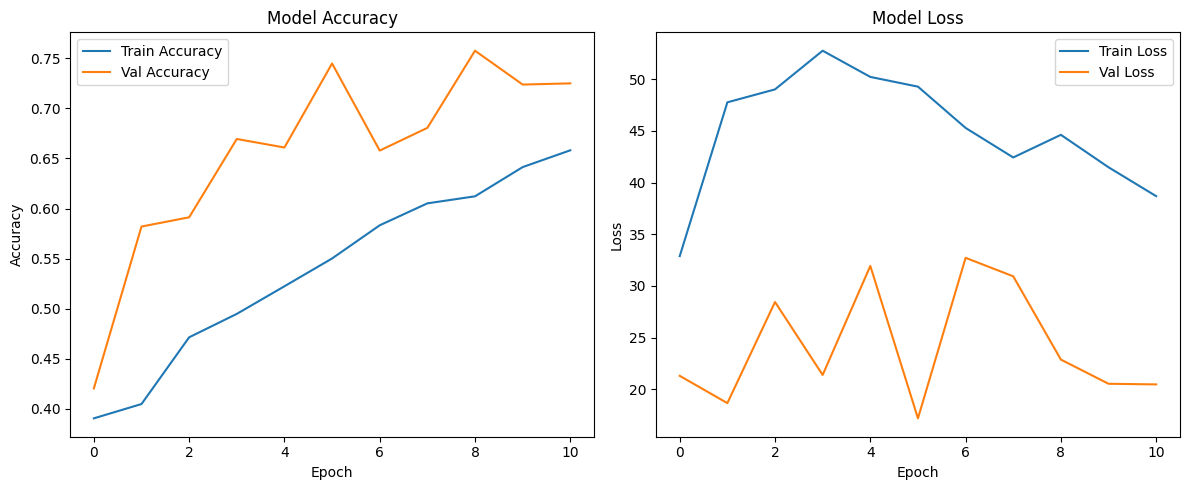

In [7]:
show_loss_accuracy_report(cnn_history_4l)

In [8]:
show_confusion_matrix_report(cnn_model_4l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
[[  69  246  368   40]
 [  71  430  633   68]
 [ 190  682 1032  134]
 [  23   93  131   22]]
              precision    recall  f1-score   support

           0       0.20      0.10      0.13       723
           1       0.30      0.36      0.32      1202
           2       0.48      0.51      0.49      2038
           3       0.08      0.08      0.08       269

    accuracy                           0.37      4232
   macro avg       0.26      0.26      0.26      4232
weighted avg       0.35      0.37      0.36      4232



In [9]:
class_names = list(val_data.class_indices.keys())
images, labels = next(val_data)

Model interpretation with GradCam for random validation images is saved to `reports/images/grad_cam`.

In [10]:
show_grad_cam_cnn(images[:4], cnn_model_4l, class_names, labels, save_dir=store_images_dir, image_name="3.7_cnn_4_layers", save_image=True)

Show prediction results for random images.

In [11]:
display(get_predication_output(images[:4], cnn_model_4l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


,image,confidence,predicted_class,actual_class
0,0,100.000000,NORMAL,NORMAL
1,1,100.000000,NORMAL,NORMAL
2,2,100.000000,NORMAL,NORMAL
3,3,98.104757,Lung_Opacity,COVID


#### Trying 8 convolutional layers

In [12]:
cnn_model_8l, cnn_history_8l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64, 128, 256], conv2d_layers=2, dense_layers=[128, 32], model_type='CNN', classification_type='categorical')

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,568,516 (36.50 MB)

 Trainable params: 9,566,596 (36.49 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 131s 239ms/step - accuracy: 0.3704 - loss: 19.4972 - val_accuracy: 0.4939 - val_loss: 6.6694 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 126s 238ms/step - accuracy: 0.5090 - loss: 22.4490 - val_accuracy: 0.6841 - val_loss: 9.8749 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 137s 259ms/step - accuracy: 0.5476 - loss: 28.0064 - val_accuracy: 0.6926 - val_loss: 13.2894 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 133s 250ms/step - accuracy: 0.5538 - loss: 32.9947 - val_accuracy: 0.5395 - val_loss: 30.9500 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 128s 242ms/step - accuracy: 0.6010 - loss: 33.4489 - val_accuracy: 0.7415 - val_loss: 15.8891 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6412 - loss: 34.5571
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
530/530 ━━━━━━━━━━━━━━━━━━

In [13]:
cnn_train_loss_8l, cnn_train_acc_8l = cnn_history_8l.history['loss'][-1], cnn_history_8l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_8l:.4f}, Train Loss: {cnn_train_loss_8l:.4f}")

cnn_test_loss_8l, cnn_test_acc_8l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_8l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_8l)
print(f"Test Accuracy: {cnn_test_acc_8l:.4f}, Test Loss: {cnn_test_loss_8l:.4f}")

Train Accuracy: 0.6405, Train Loss: 34.4382
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4950 - loss: 6.7217
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step


/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/15 10:21:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 5


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/b70f249345184ea58d9f3a4746594105
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.4939, Test Loss: 6.6694


Created version '5' of model 'tensorflow-CNN-multiclass'.


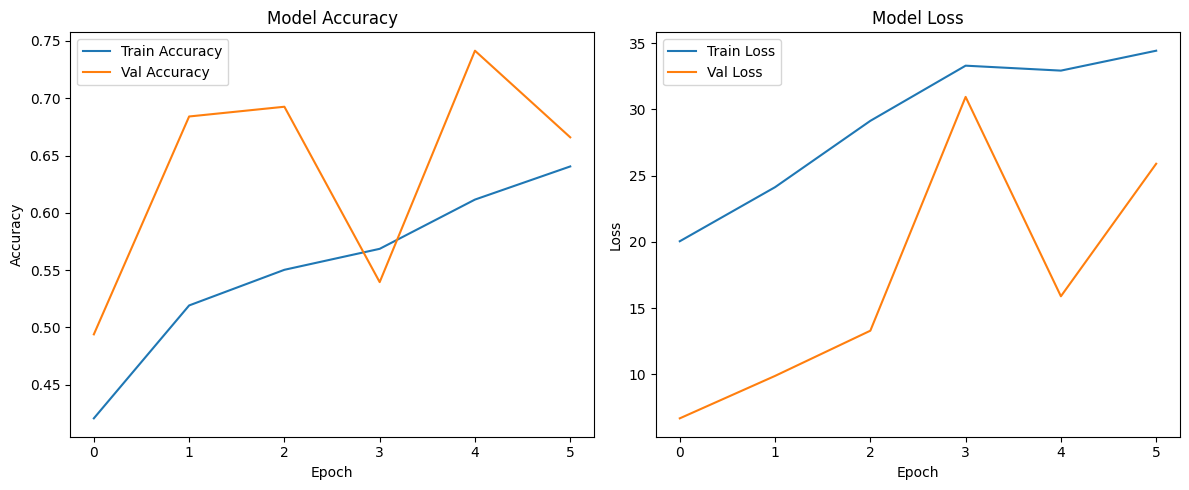

In [14]:
show_loss_accuracy_report(cnn_history_8l)

In [29]:
show_confusion_matrix_report(cnn_model_8l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step
[[   0  125  525   73]
 [   0  237  879   86]
 [   0  365 1500  173]
 [   0   56  186   27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       723
           1       0.30      0.20      0.24      1202
           2       0.49      0.74      0.59      2038
           3       0.08      0.10      0.09       269

    accuracy                           0.42      4232
   macro avg       0.22      0.26      0.23      4232
weighted avg       0.32      0.42      0.36      4232



/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

In [15]:
show_grad_cam_cnn(images[:4], cnn_model_8l, class_names, labels, save_dir=store_images_dir, image_name="3.7_cnn_8_layers", save_image=True)

In [16]:
display(get_predication_output(images[:4], cnn_model_8l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


,image,confidence,predicted_class,actual_class
0,0,69.410241,NORMAL,NORMAL
1,1,99.819213,NORMAL,NORMAL
2,2,99.207991,NORMAL,NORMAL
3,3,97.506917,NORMAL,COVID


#### Trying 12 convolutional layers

In [17]:
cnn_model_12l, cnn_history_12l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64, 128, 256], conv2d_layers=3, dense_layers=[128, 32], model_type='CNN', classification_type='categorical')

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_2 (Resizing)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 10,354,276 (39.50 MB)

 Trainable params: 10,351,396 (39.49 MB)

 Non-trainable params: 2,880 (11.25 KB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 195s 359ms/step - accuracy: 0.3870 - loss: 21.3345 - val_accuracy: 0.1860 - val_loss: 15.5392 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 189s 356ms/step - accuracy: 0.5115 - loss: 26.8536 - val_accuracy: 0.6983 - val_loss: 11.5583 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 197s 372ms/step - accuracy: 0.5427 - loss: 33.0343 - val_accuracy: 0.6994 - val_loss: 18.2630 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 192s 363ms/step - accuracy: 0.5432 - loss: 44.4646 - val_accuracy: 0.1366 - val_loss: 460.7675 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 196s 370ms/step - accuracy: 0.5789 - loss: 47.0368 - val_accuracy: 0.7060 - val_loss: 29.5470 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 194s 367ms/step - accuracy: 0.5803 - loss: 48.2418 - val_accuracy: 0.2481 - val_loss: 337.1574 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━

In [18]:
cnn_train_loss_12l, cnn_train_acc_12l = cnn_history_12l.history['loss'][-1], cnn_history_12l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_12l:.4f}, Train Loss: {cnn_train_loss_12l:.4f}")

cnn_test_loss_12l, cnn_test_acc_12l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_12l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_12l)
print(f"Test Accuracy: {cnn_test_acc_12l:.4f}, Test Loss: {cnn_test_loss_12l:.4f}")

Train Accuracy: 0.5948, Train Loss: 51.4673
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.6913 - loss: 12.1112
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/15 10:44:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 6


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/890581e1da4042af997ef3db34f435dc
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.6983, Test Loss: 11.5583


Created version '6' of model 'tensorflow-CNN-multiclass'.


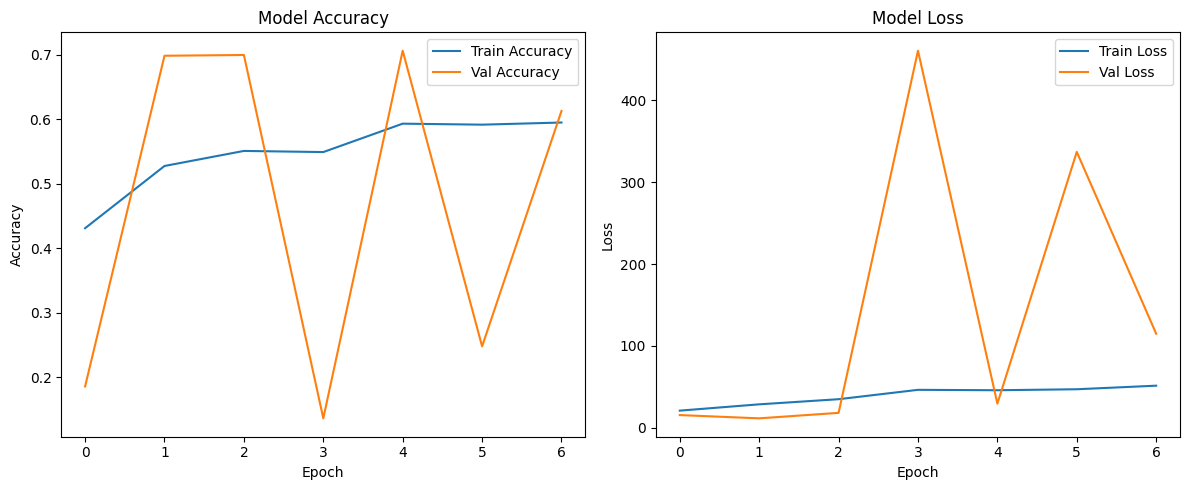

In [19]:
show_loss_accuracy_report(cnn_history_12l)

In [28]:
show_confusion_matrix_report(cnn_model_12l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step
[[ 95 240 287 101]
 [125 422 499 156]
 [263 715 809 251]
 [ 40  95 108  26]]
              precision    recall  f1-score   support

           0       0.18      0.13      0.15       723
           1       0.29      0.35      0.32      1202
           2       0.48      0.40      0.43      2038
           3       0.05      0.10      0.06       269

    accuracy                           0.32      4232
   macro avg       0.25      0.24      0.24      4232
weighted avg       0.34      0.32      0.33      4232



In [20]:
show_grad_cam_cnn(images[:4], cnn_model_12l, class_names, labels, save_dir=store_images_dir, image_name="3.7_cnn_12_layers", save_image=True)

In [21]:
display(get_predication_output(images[:4], cnn_model_12l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,image,confidence,predicted_class,actual_class
0,0,100.0,NORMAL,NORMAL
1,1,100.0,NORMAL,NORMAL
2,2,100.0,NORMAL,NORMAL
3,3,100.0,Viral Pneumonia,COVID


#### Trying 16 convolutional layers

In [22]:
cnn_model_16l, cnn_history_16l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64, 128, 256], conv2d_layers=4, dense_layers=[128, 32], model_type='CNN', classification_type='categorical')

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_3 (Resizing)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 64, 64, 64)     │             

 Total params: 11,140,036 (42.50 MB)

 Trainable params: 11,136,196 (42.48 MB)

 Non-trainable params: 3,840 (15.00 KB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 262s 481ms/step - accuracy: 0.3562 - loss: 22.2160 - val_accuracy: 0.5281 - val_loss: 8.7554 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 263s 497ms/step - accuracy: 0.5022 - loss: 21.5491 - val_accuracy: 0.4577 - val_loss: 31.6031 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 260s 490ms/step - accuracy: 0.5361 - loss: 28.9609 - val_accuracy: 0.5135 - val_loss: 97.3873 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 261s 492ms/step - accuracy: 0.5664 - loss: 36.3447 - val_accuracy: 0.6491 - val_loss: 26.6219 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 260s 491ms/step - accuracy: 0.5811 - loss: 38.6831 - val_accuracy: 0.6545 - val_loss: 50.6736 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.5947 - loss: 42.5597
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
530/530 ━━━━━━━━━━━━━━━━━

In [23]:
cnn_train_loss_16l, cnn_train_acc_16l = cnn_history_16l.history['loss'][-1], cnn_history_16l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_16l:.4f}, Train Loss: {cnn_train_loss_16l:.4f}")

cnn_test_loss_16l, cnn_test_acc_16l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_16l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_16l)
print(f"Test Accuracy: {cnn_test_acc_16l:.4f}, Test Loss: {cnn_test_loss_16l:.4f}")

Train Accuracy: 0.6031, Train Loss: 43.7132
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5294 - loss: 8.8189
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/15 11:11:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 7


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/b1f07b8d973b4687803367c77576a522
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.5281, Test Loss: 8.7554


Created version '7' of model 'tensorflow-CNN-multiclass'.


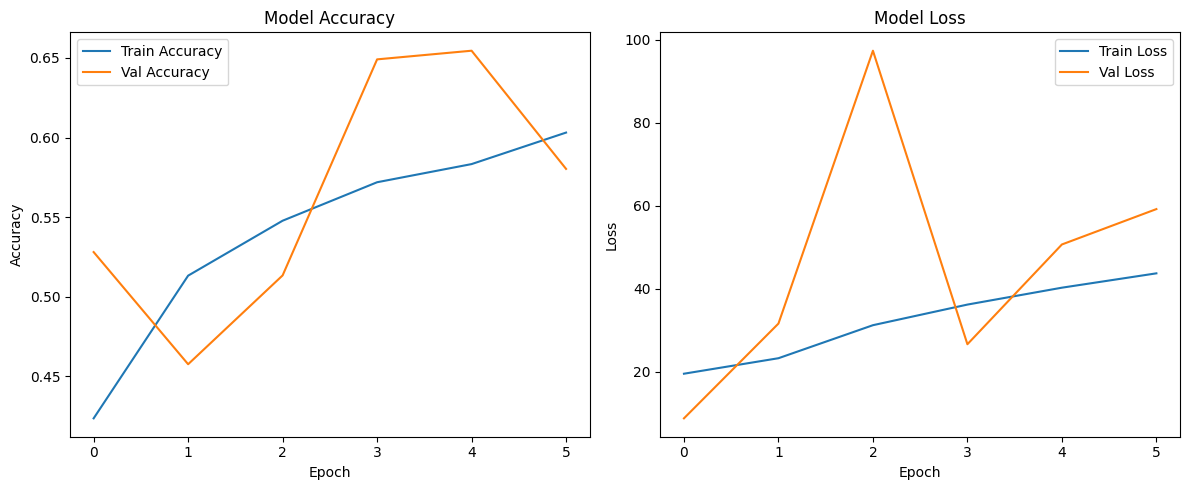

In [24]:
show_loss_accuracy_report(cnn_history_16l)

In [27]:
show_confusion_matrix_report(cnn_model_16l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step
[[  6 275 238 204]
 [ 11 450 433 308]
 [ 23 806 752 457]
 [  3  98 103  65]]
              precision    recall  f1-score   support

           0       0.14      0.01      0.02       723
           1       0.28      0.37      0.32      1202
           2       0.49      0.37      0.42      2038
           3       0.06      0.24      0.10       269

    accuracy                           0.30      4232
   macro avg       0.24      0.25      0.21      4232
weighted avg       0.34      0.30      0.30      4232



In [25]:
show_grad_cam_cnn(images[:4], cnn_model_16l, class_names, labels, save_dir=store_images_dir, image_name="3.7_cnn_16_layers", save_image=True)

In [26]:
display(get_predication_output(images[:4], cnn_model_16l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,image,confidence,predicted_class,actual_class
0,0,99.999976,Viral Pneumonia,NORMAL
1,1,100.000000,NORMAL,NORMAL
2,2,99.999988,Lung_Opacity,NORMAL
3,3,100.000000,Viral Pneumonia,COVID
